In [2]:
import pandas as pd

df=pd.read_excel('Topic_Modeling\Data\전처리_10182.xlsx',sheet_name='Sheet2')

df.head()

,filelist,cleanedsdgs
0,1.samsung_electronic2021.txt,health use concern environment health safety m...
1,2.sk_hynix2021.txt,investment cooperation increase partner wedote...
2,3.NAVER_2020.txt,number youth employment decent entrepreneurshi...
3,4.Samsung_Biologics_2021.txt,goal quality education learning goal gender eq...
4,6.KAKAO_2020.txt,number youth employment decent entrepreneurshi...


## Word Count 

In [3]:
len(df)

19

In [4]:
temp=[i.split() for i in df.cleanedsdgs.to_list()]
temp[:2]



[['health',
  'use',
  'concern',
  'environment',
  'health',
  'safety',
  'manufacturing',
  'disclosure',
  'substance',
  'process',
  'inhouse',
  'therapy',
  'treatment',
  'center',
  'health',
  'center',
  'education',
  'development',
  'variety',
  'support',
  'ict',
  'knowledge',
  'expertise',
  'future',
  'education',
  'curriculum',
  'support',
  'innovation',
  'campus',
  'samsung',
  'solve',
  'tomorrow',
  'growth',
  'stability',
  'change',
  'globe',
  'youth',
  'leadership',
  'training',
  'work',
  'support',
  'childbirth',
  'childcare',
  'company',
  'ministry',
  'gender',
  'equality',
  'family',
  'use',
  'water',
  'reuse',
  'recycle',
  'campaign',
  'wastewater',
  'inhouse',
  'standard',
  'country',
  'impact',
  'water',
  'world',
  'water',
  'day',
  'event',
  'water',
  'energy',
  'use',
  'climate',
  'change',
  'use',
  'energy',
  'installation',
  'power',
  'purchasing',
  'pricing',
  'energy',
  'innovation',
  'growth',
 

In [5]:
def flatten(l):
    flatlist=[]
    for elem in l:
        if type(elem) ==list:
            for e in elem:
                flatlist.append(e)
        else:
            flatlist.append(elem)
    return flatlist

In [6]:
word_list=flatten(temp)

In [11]:
word_list

'health'

In [10]:
type(word_list)

pandas.core.series.Series

In [9]:
word_list=pd.Series([x for x in word_list if len(x)>2]) #한글자는  제외


In [12]:
word_list.value_counts().head(30)

energy            73
management        72
business          48
development       47
support           47
growth            42
quality           39
education         38
culture           31
environment       30
use               30
goal              28
health            28
safety            27
information       26
infrastructure    26
service           24
program           23
water             23
value             23
power             22
work              21
access            20
change            20
society           20
sdgs              19
consumption       18
beauty            18
group             18
company           18
dtype: int64

In [43]:
fre = pd.DataFrame(word_list.value_counts().head(30))
fre

,0
energy,73
management,72
business,48
support,47
development,47
growth,42
quality,39
education,38
culture,31
use,30


In [45]:
fre.columns=['frequency']

In [48]:
fre

,frequency
energy,73
management,72
business,48
support,47
development,47
growth,42
quality,39
education,38
culture,31
use,30


## WordCloud

In [49]:
from wordcloud import WordCloud # Joohye, you need to install wordcloud
from collections import Counter # in conda CLI by doing "conda install -c conda-forge wordcloud"

In [62]:
font_path="./install/NanumGothic.ttf" #pre-downloaded in the folder
wordcloud=WordCloud(font_path, width=800, height=800, background_color="white")

In [56]:
# font_path

'../install/NanumGothic.ttf'

In [63]:
count = Counter(word_list)
wordcloud=wordcloud.generate_from_frequencies(count)

In [64]:
array=wordcloud.to_array()

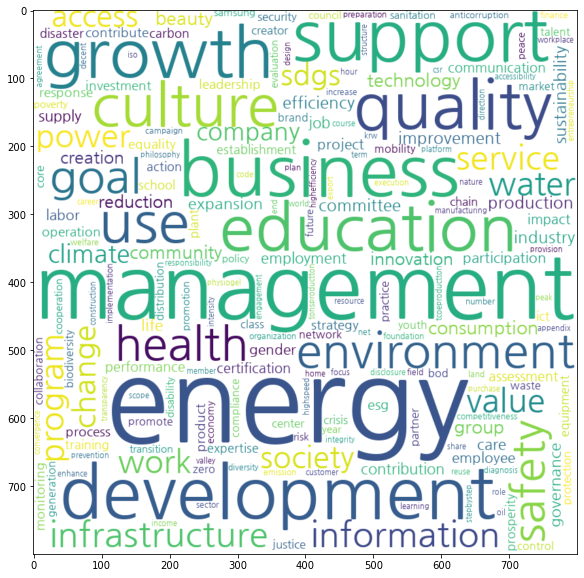

<Figure size 432x288 with 0 Axes>

In [65]:
%matplotlib inline
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10,10))
plt.imshow(array, interpolation='bilinear')
plt.show()
plt.savefig('word_1.png')